In [1]:
#import library
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [2]:
df = pd.read_csv('IKEA.csv')
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 277.8+ KB


In [4]:
df.isna().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [5]:
df.dropna(inplace=True)

df.isna().sum()

Unnamed: 0           0
item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 3 to 3688
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1899 non-null   int64  
 1   item_id            1899 non-null   int64  
 2   name               1899 non-null   object 
 3   category           1899 non-null   object 
 4   price              1899 non-null   float64
 5   old_price          1899 non-null   object 
 6   sellable_online    1899 non-null   bool   
 7   link               1899 non-null   object 
 8   other_colors       1899 non-null   object 
 9   short_description  1899 non-null   object 
 10  designer           1899 non-null   object 
 11  depth              1899 non-null   float64
 12  height             1899 non-null   float64
 13  width              1899 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 157.6+ KB


In [7]:
from sklearn.preprocessing import StandardScaler

#subset dan scale data
df_subset = df[['depth','height']]
plt.show()

ss = StandardScaler()
scaled = ss.fit_transform(df_subset)

# UNSUPERVISED LEARNING 

Penggunaan algoritma kecerdasan buatan atau artificial intelligence (AI) untuk mengidentifikasi pola dalam kumpulan data yang berisi titik data yang tidak diklasifikasikan atau diberi label.

# Hierarchihcal Clustering 

Metode pengelompokan data yang dimulai dengan setiap satu pengamatan sebagai clusternya sendiri kemudian terus mengelompokkan pengamatan ke dalam kelompok yang semakin besar.

## Agglomerative Clustering 

In [8]:
from sklearn.cluster import AgglomerativeClustering

#membuat objek dari AgglomerativeClustering dnegna jumlah cluster 3
HC = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

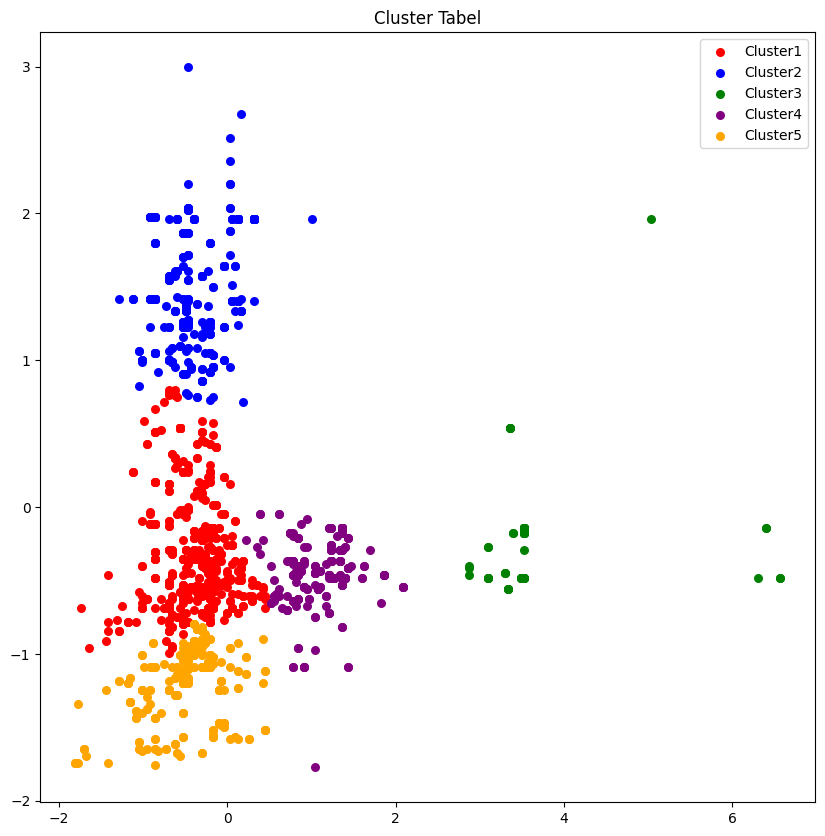

In [9]:
AC = HC.fit_predict(scaled)

#visualisasi cluster
plt.figure(figsize=(10,10))

#data point
plt.scatter(scaled[AC==0, 0],scaled[AC==0, 1], s=30, c='red', label ='Cluster1')
plt.scatter(scaled[AC==1, 0],scaled[AC==1, 1], s=30, c='blue', label ='Cluster2')
plt.scatter(scaled[AC==2, 0],scaled[AC==2, 1], s=30, c='green', label ='Cluster3')
plt.scatter(scaled[AC==3, 0],scaled[AC==3, 1], s=30, c='purple', label ='Cluster4')
plt.scatter(scaled[AC==4, 0],scaled[AC==4, 1], s=30, c='orange', label ='Cluster5')

plt.title("Cluster Tabel")
plt.legend()
plt.show()

## Dendogram

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [11]:
HR_linkrase = linkage(scaled, method='ward')

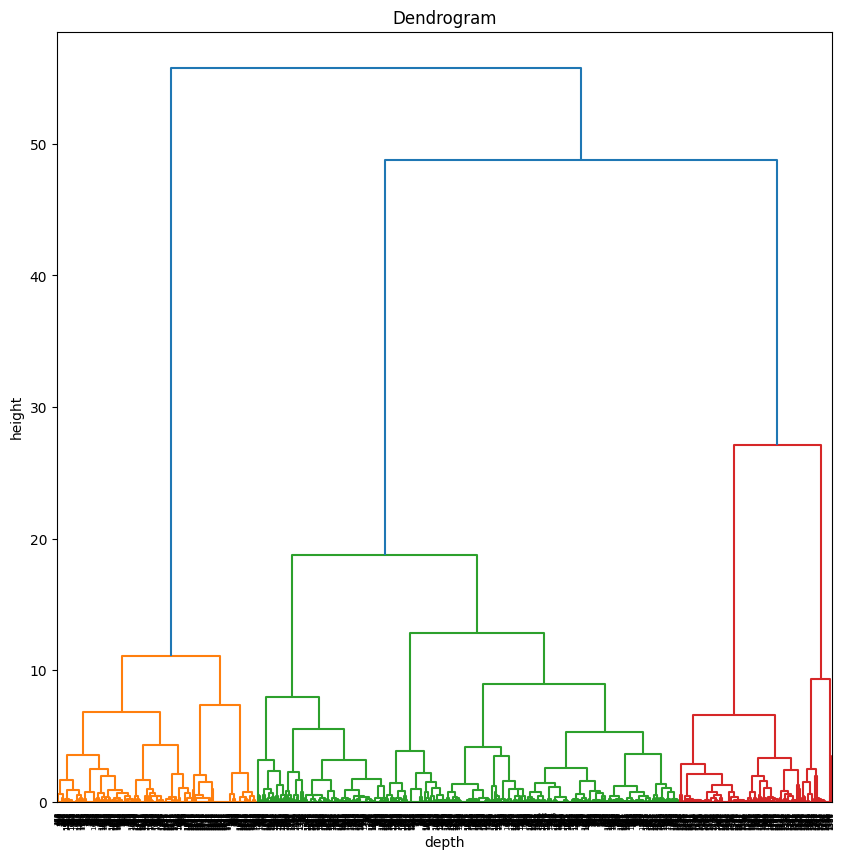

In [12]:
plt.figure(figsize=(10,10))
dendrogram(HR_linkrase)
plt.title("Dendrogram")
plt.xlabel("depth")
plt.ylabel("height")
plt.show()

## Kmean Clustering
Menentukan kelompok-kelompok dalam set data. Caranya adalah dengan melihat jumlah grup yang diwakili variabel K. Untuk bisa mengelompokkan data, algoritma ini bekerja secara berulang (iteratif) dari setiap titik data ke grup K yang telah dibuat.


In [13]:
from sklearn.cluster import KMeans

In [14]:
points = df[['depth', 'height']]
points = points.values

In [15]:
#Buat objek dari k means dengan jumlah cluster : 4
model = KMeans(n_clusters=4)

#fit terhadap model
model.fit(points)

KMeans(n_clusters=4)

In [16]:
y = model.fit_predict(points)
print(y)

[3 1 3 ... 0 0 0]


In [17]:
centroid = model.cluster_centers_

centroid_x = centroid[:,0]
centroid_y = centroid[:,1]

In [18]:
centroid

array([[ 45.98809524, 205.77777778],
       [ 42.92153589,  53.39899833],
       [108.0773639 ,  89.70200573],
       [ 44.81879195, 106.91498881]])

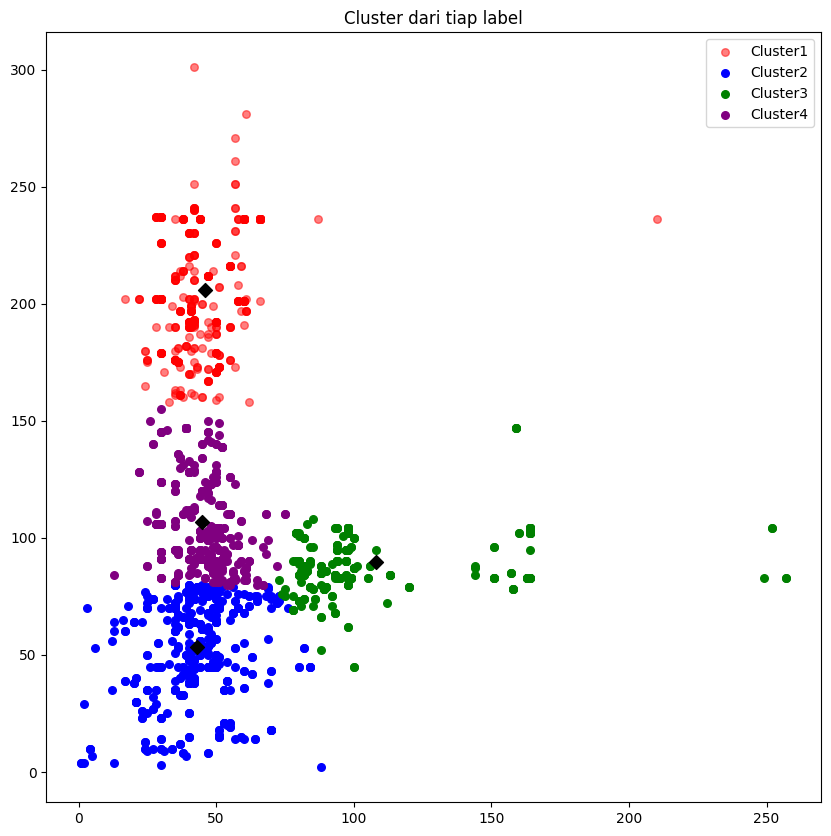

In [19]:
#visualisasi cluster
plt.figure(figsize=(10,10))

#data point
plt.scatter(points[y==0, 0],points[y==0, 1], s=30, c='red', label ='Cluster1', alpha=0.5)
plt.scatter(points[y==1, 0],points[y==1, 1], s=30, c='blue', label ='Cluster2')
plt.scatter(points[y==2, 0],points[y==2, 1], s=30, c='green', label ='Cluster3')
plt.scatter(points[y==3, 0],points[y==3, 1], s=30, c='purple', label ='Cluster4')

#centroid point
plt.scatter(centroid_x, centroid_y, marker='D', s=50 ,c='black')
plt.title("Cluster dari tiap label")
plt.legend()
plt.show()

In [21]:
#menentukan jumlah cluster
cluster = range(1,7)
inertias = []

for n in cluster :
    model = KMeans(n_clusters=n)
    model.fit(points)
    inertias.append(model.inertia_)

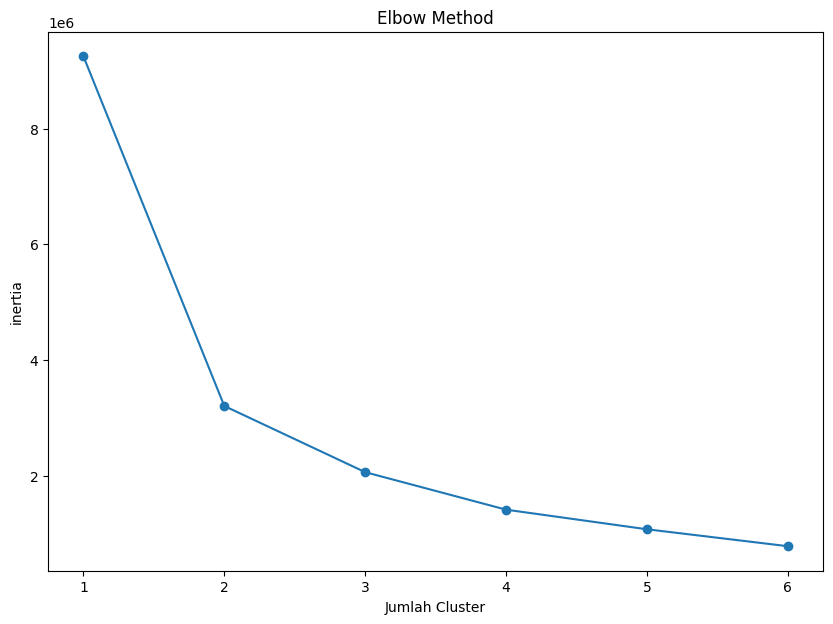

In [22]:
#plot ks vs inertias
plt.figure(figsize = (10,7))
plt.plot(cluster, inertias, '-o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("inertia")
plt.title("Elbow Method")
plt.xticks(cluster)
plt.show()